<a href="https://colab.research.google.com/github/hagusta/colab/blob/master/Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastai
!pip install -Uqq fastbook
import fastai
import fastbook
import torch

fastbook.setup_book()

     |████████████████████████████████| 194kB 5.7MB/s 
     |████████████████████████████████| 61kB 5.4MB/s 
     |████████████████████████████████| 727kB 4.3MB/s 
     |████████████████████████████████| 1.2MB 19.6MB/s 
     |████████████████████████████████| 51kB 5.6MB/s 
Mounted at /content/gdrive


In [ ]:
from fastai.vision.all import *

In [ ]:
!pip install timm

     |████████████████████████████████| 245kB 4.2MB/s 
  Using cached https://files.pythonhosted.org/packages/19/f1/d1d9b2be9f50e840accfa180ec2fb759dd2504f2b3a12a232398d5fa00ae/torchvision-0.8.2-cp36-cp36m-manylinux1_x86_64.whl
ERROR: torchvision 0.8.2 has requirement torch==1.7.1, but you'll have torch 1.7.0+cu101 which is incompatible.


# resnext50_32x4d

In [ ]:
import timm

In [ ]:
model = timm.create_model('resnext50_32x4d', pretrained=true)

In [ ]:
model.fc=nn.Linear(2048,5)

In [ ]:
!tar xzf gdrive/MyDrive/casava_data/casava.tar.gz --directory /dev/shm

In [ ]:
import json
df=pd.read_csv('/dev/shm/casava/train.csv')
f=open('/dev/shm/casava/label_num_to_disease_map.json')
#label_name=dict(json.load(f))
label_name_dict=dict({'0':'CBB',
                 '1':'CBSD',
                 '2':'CGM',
                 '3':'CMD',
                 '4':'Healty'})
imgs=df.image_id.to_list()
lbl=df.label.to_list()
labels=[ label_name_dict[str(i)] for i in lbl]
label_dict=dict(zip(imgs,labels))

In [ ]:
def get_label(o): return label_dict[o.name]
casava=DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    #get_y=lambda p: label_dict[p.name],
    #get_y=parent_label,
    get_y=get_label,
    #item_tfms=Resize(512),
    batch_tfms=[*aug_transforms(size=224,mult=2),Normalize.from_stats(*imagenet_stats)]
    )

In [ ]:
path=Path('/dev/shm/casava/train_images')
dls = casava.dataloaders(path,bs=8)

In [ ]:
learn = Learner(dls,
                    model,
                    metrics=error_rate).to_fp16()

/usr/local/lib/python3.6/dist-packages/torch/cuda/amp/autocast_mode.py:114: UserWarning: torch.cuda.amp.autocast only affects CUDA ops, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.autocast only affects CUDA ops, but CUDA is not available.  Disabling.")


In [ ]:
learn.freeze()
learn.fit_one_cycle(1)

/usr/local/lib/python3.6/dist-packages/torch/cuda/amp/grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


epoch,train_loss,valid_loss,error_rate,time


# sandbox

In [ ]:
!pip install -Uqq pretrainedmodels

     |████████████████████████████████| 61kB 3.2MB/s 


In [ ]:
from torchvision.models import *
import pretrainedmodels

from fastai.vision import *
from fastai.vision.models import *
from fastai.vision.learner import model_meta

#from utils import *
import sys


In [ ]:
def resnext50_32x4d(pretrained=False):
    pretrained = 'imagenet' if pretrained else None
    model = timm.create_model('resnext50_32x4d', pretrained=pretrained)
    all_layers = list(model.children())
    return nn.Sequential(all_layers[0], *all_layers[1:])


In [ ]:
path = untar_data(URLs.MNIST_SAMPLE)
data = ImageDataLoaders.from_folder(path, ds_tfms=aug_transforms(mult=2.0),
                                 size=26)

In [ ]:
learn = cnn_learner(data, partial(resnext50_32x4d,pretrained=True), metrics=accuracy)
#

In [ ]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.401643,0.297434,0.895976,06:36


In [ ]:
learn2 = cnn_learner(data,models.resnet18, metrics=[accuracy,error_rate])

In [ ]:
learn = Learner(data,
                    model,
                    metrics=error_rate).to_fp16()

/usr/local/lib/python3.6/dist-packages/torch/cuda/amp/autocast_mode.py:114: UserWarning: torch.cuda.amp.autocast only affects CUDA ops, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.autocast only affects CUDA ops, but CUDA is not available.  Disabling.")


In [ ]:
list(learn.model.children())[-1]

Linear(in_features=2048, out_features=5, bias=True)

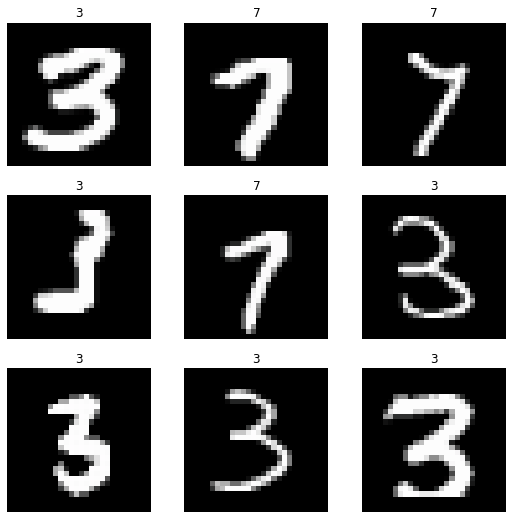

In [ ]:
data.show_batch()

In [ ]:
x,y = zip(*data.train_ds)

In [ ]:
y_labels = list(map(lambda a : a.item() ,y))

In [ ]:
y_labels[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
import pandas as pd

In [ ]:
tbl=pd.DataFrame(dict({'labels': y_labels}))

In [ ]:
tbl.labels.value_counts()

1    6265
0    6131
Name: labels, dtype: int64